In [2]:
import numpy as np
import networkx as nx
import cv2
from PIL import Image
import random
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_path = {}
file_path['class'] = ["../video/class.mp4", "../video/class_1.mp4", "../video/class_2.mp4"]
file_path['ERF_alley'] = ["../video/ERF_alley.mp4", "../video/ERF_alley_1.mp4", "../video/ERF_alley_2.mp4", "../video/ERF_alley_3.mp4"]
file_path['halway_1'] = ["../video/halway_1.mp4", "../video/halway_1_1.mp4"]
file_path['halway_2'] = ["../video/halway_2.mp4"]
file_path['halway_3'] = ["../video/halway_3.mp4", "../video/halway_3_1.mp4"]
file_path['halway_4'] = ["../video/halway_4.mp4"]
file_path['outdoor'] = ["../video/outdoor.mp4"]
file_path['lecture_center'] = ["../video/lecture_center.mp4"]
file_path['lecture_alley'] = ["../video/lecture_alley.mp4"]
file_path['out_office'] = ["../video/out_office.mp4", "../video/out_office_1.mp4"]

In [5]:
places = {}
for i, key in enumerate(file_path.keys()):
    places[key] = {"id": i, "data":f"../data/{key}.npy"}


In [6]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')
model.to("cuda")
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

tfms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])


Loaded pretrained weights for efficientnet-b0


# Functions

In [7]:
def get_features(img):
    img = Image.fromarray(img)
    img_transform = tfms(img).unsqueeze(0).to("cuda")
    im_vec = torch.tensor(model.extract_features(img_transform).view(-1)).unsqueeze(0)
    return im_vec

In [8]:
def matching_features(G, features, threshold = 0.25):
    features_dict = nx.get_node_attributes(G, "features")
    # print(type(features_dict))
    values = []
    for key, value in features_dict.items():
        v = cos(features, value)
        values.append(v.cpu().numpy()[0])
        if v > threshold:
            # if len(features_dict.keys()) > 5 and v < (len(features_dict.keys()) - 3):
                # print(f"FOUND THIS:{key}")
            return key

    # print(values)
    return -1

In [ ]:
def add_node(G, number):
    G.add_node(number)
    G.add_edge(number-1, number)
    return G

In [27]:
def parse_add_node(G, image, threshold):
    features = get_features(img=image)
    n = matching_features(G, features, threshold)
    if n == -1:
        G = add_node(G, G.number_of_nodes() + 1)
    return G, n

In [9]:
# del class_data
# del halway_1
# del halway_2
# del outdoor
# del lecture_center

In [10]:
# class_data = np.load("../data/class.npy")[:150, :, :, :]
# halway_1 = np.load("../data/halway_1.npy")[:150, :, :, :]
# halway_2 = np.load("../data/halway_2.npy")[:150, :, :, :]
# outdoor = np.load("../data/outdoor.npy")[:150, :, :, :]
# lecture_center = np.load("../data/lecture_center.npy")[:50, :, :, :]


In [11]:
# data = [class_data, halway_1, halway_2, outdoor, lecture_center]

In [12]:
# class_room_data = torchvision.io.read_video("../video/halway_2.mp4")
# class_room_data = class_room_data[0].numpy()
# old_fet = get_features(class_room_data[0])

# for i in class_room_data[:50]:
#     fet = get_features(i)
#     print(cos(fet, old_fet))


In [13]:
cam = cv2.VideoCapture("../video/round_path.mp4")

  6%|▋         | 25/400 [00:03<00:51,  7.30it/s]

Adding new node: 1, number of frames 25


 13%|█▎        | 53/400 [00:07<00:50,  6.89it/s]

Adding new node: 2, number of frames 53


 20%|█▉        | 79/400 [00:12<00:52,  6.13it/s]

Adding new node: 4, number of frames 78


 23%|██▎       | 91/400 [00:14<00:51,  6.01it/s]

Adding new node: 6, number of frames 90


 34%|███▎      | 134/400 [00:20<00:43,  6.14it/s]

Adding new node: 8, number of frames 133


 34%|███▍      | 136/400 [00:20<00:39,  6.65it/s]

FOUND THIS:8
FOUND THIS:8


 34%|███▍      | 138/400 [00:20<00:38,  6.82it/s]

FOUND THIS:10
FOUND THIS:10


 35%|███▌      | 140/400 [00:20<00:37,  6.95it/s]

FOUND THIS:8
FOUND THIS:10


 36%|███▌      | 142/400 [00:21<00:36,  6.99it/s]

FOUND THIS:10
FOUND THIS:10


 36%|███▌      | 143/400 [00:21<00:37,  6.83it/s]

FOUND THIS:8
FOUND THIS:10


 36%|███▋      | 145/400 [00:21<00:37,  6.78it/s]

FOUND THIS:10
FOUND THIS:8


 37%|███▋      | 148/400 [00:22<00:35,  7.01it/s]

FOUND THIS:10
FOUND THIS:10


 37%|███▋      | 149/400 [00:22<00:36,  6.96it/s]

FOUND THIS:10
FOUND THIS:10


 38%|███▊      | 152/400 [00:22<00:34,  7.12it/s]

FOUND THIS:10
FOUND THIS:10


 38%|███▊      | 154/400 [00:22<00:35,  6.92it/s]

FOUND THIS:10
FOUND THIS:10


 39%|███▉      | 155/400 [00:23<00:35,  6.93it/s]

FOUND THIS:10
FOUND THIS:10


 39%|███▉      | 157/400 [00:23<00:35,  6.84it/s]

FOUND THIS:10
FOUND THIS:10


 40%|████      | 160/400 [00:23<00:35,  6.85it/s]

FOUND THIS:10
FOUND THIS:10


 40%|████      | 162/400 [00:24<00:34,  6.99it/s]

FOUND THIS:10
FOUND THIS:10


 41%|████      | 163/400 [00:24<00:34,  6.95it/s]

FOUND THIS:10
FOUND THIS:10


 42%|████▏     | 166/400 [00:24<00:33,  6.95it/s]

FOUND THIS:10
FOUND THIS:10


 42%|████▏     | 168/400 [00:25<00:33,  6.91it/s]

FOUND THIS:10
FOUND THIS:10


 42%|████▏     | 169/400 [00:25<00:33,  6.98it/s]

FOUND THIS:10
FOUND THIS:10


 43%|████▎     | 172/400 [00:25<00:31,  7.18it/s]

FOUND THIS:10
FOUND THIS:10


 44%|████▎     | 174/400 [00:25<00:32,  7.05it/s]

FOUND THIS:10
FOUND THIS:10


 44%|████▍     | 175/400 [00:26<00:32,  6.95it/s]

FOUND THIS:10
FOUND THIS:10


 44%|████▍     | 178/400 [00:26<00:30,  7.21it/s]

FOUND THIS:10
FOUND THIS:10


 45%|████▌     | 180/400 [00:26<00:30,  7.21it/s]

FOUND THIS:10
FOUND THIS:10


 46%|████▌     | 182/400 [00:26<00:30,  7.20it/s]

FOUND THIS:10
FOUND THIS:10


 46%|████▌     | 184/400 [00:27<00:30,  7.01it/s]

FOUND THIS:10
FOUND THIS:10


 46%|████▋     | 185/400 [00:27<00:33,  6.43it/s]

FOUND THIS:10
FOUND THIS:10


 47%|████▋     | 187/400 [00:27<00:35,  5.99it/s]

FOUND THIS:10
FOUND THIS:10


 47%|████▋     | 189/400 [00:28<00:34,  6.12it/s]

FOUND THIS:10
FOUND THIS:10


 48%|████▊     | 191/400 [00:28<00:32,  6.39it/s]

FOUND THIS:10
FOUND THIS:10


 48%|████▊     | 194/400 [00:28<00:30,  6.71it/s]

FOUND THIS:10
FOUND THIS:10


 49%|████▉     | 196/400 [00:29<00:29,  6.81it/s]

FOUND THIS:10
FOUND THIS:10


 50%|████▉     | 198/400 [00:29<00:29,  6.88it/s]

FOUND THIS:10
FOUND THIS:10


 50%|████▉     | 199/400 [00:29<00:29,  6.81it/s]

FOUND THIS:10
FOUND THIS:10


 50%|█████     | 200/400 [00:29<00:29,  6.73it/s]

restarting the video


 50%|█████     | 201/400 [00:30<00:43,  4.62it/s]

FOUND THIS:10


 50%|█████     | 202/400 [00:30<00:45,  4.34it/s]

FOUND THIS:0
FOUND THIS:0


 51%|█████▏    | 205/400 [00:30<00:33,  5.84it/s]

FOUND THIS:0
FOUND THIS:0


 52%|█████▏    | 207/400 [00:31<00:30,  6.37it/s]

FOUND THIS:0
FOUND THIS:0


 52%|█████▏    | 209/400 [00:31<00:28,  6.70it/s]

FOUND THIS:0
FOUND THIS:0


 53%|█████▎    | 211/400 [00:31<00:27,  6.84it/s]

FOUND THIS:0
FOUND THIS:0


 53%|█████▎    | 213/400 [00:31<00:27,  6.89it/s]

FOUND THIS:0
FOUND THIS:0


 54%|█████▍    | 215/400 [00:32<00:26,  6.95it/s]

FOUND THIS:0
FOUND THIS:0


 54%|█████▍    | 216/400 [00:32<00:26,  6.93it/s]

FOUND THIS:0
FOUND THIS:0


 55%|█████▍    | 219/400 [00:32<00:25,  7.00it/s]

FOUND THIS:0
FOUND THIS:0


 55%|█████▌    | 221/400 [00:33<00:25,  6.94it/s]

FOUND THIS:0
FOUND THIS:0


 56%|█████▌    | 223/400 [00:33<00:25,  6.97it/s]

FOUND THIS:0
FOUND THIS:0


 56%|█████▌    | 224/400 [00:33<00:25,  6.96it/s]

FOUND THIS:0
FOUND THIS:0


 57%|█████▋    | 227/400 [00:33<00:24,  6.95it/s]

FOUND THIS:0
FOUND THIS:2


 57%|█████▋    | 228/400 [00:34<00:24,  6.91it/s]

FOUND THIS:0
FOUND THIS:2


 58%|█████▊    | 231/400 [00:34<00:24,  7.00it/s]

FOUND THIS:0
FOUND THIS:2


 58%|█████▊    | 233/400 [00:34<00:24,  6.89it/s]

FOUND THIS:2
FOUND THIS:2


 58%|█████▊    | 234/400 [00:34<00:24,  6.91it/s]

FOUND THIS:2
FOUND THIS:2


 59%|█████▉    | 237/400 [00:35<00:23,  7.07it/s]

FOUND THIS:2
FOUND THIS:2


 60%|█████▉    | 238/400 [00:35<00:23,  6.86it/s]

FOUND THIS:2
FOUND THIS:2


 60%|██████    | 241/400 [00:36<00:23,  6.82it/s]

FOUND THIS:2
FOUND THIS:2


 60%|██████    | 242/400 [00:36<00:23,  6.80it/s]

FOUND THIS:2
FOUND THIS:2


 61%|██████    | 244/400 [00:36<00:22,  6.81it/s]

FOUND THIS:2
FOUND THIS:2


 62%|██████▏   | 247/400 [00:36<00:22,  6.86it/s]

FOUND THIS:2
FOUND THIS:2


 62%|██████▏   | 248/400 [00:37<00:22,  6.76it/s]

FOUND THIS:2
FOUND THIS:2


 62%|██████▎   | 250/400 [00:37<00:22,  6.59it/s]

FOUND THIS:2
FOUND THIS:2


 63%|██████▎   | 253/400 [00:37<00:21,  6.87it/s]

FOUND THIS:2
FOUND THIS:4


 64%|██████▍   | 255/400 [00:38<00:21,  6.85it/s]

FOUND THIS:4
FOUND THIS:4


 64%|██████▍   | 256/400 [00:38<00:20,  6.89it/s]

FOUND THIS:4
FOUND THIS:4


 64%|██████▍   | 258/400 [00:38<00:20,  6.82it/s]

FOUND THIS:2
FOUND THIS:4


 65%|██████▌   | 260/400 [00:38<00:20,  6.79it/s]

FOUND THIS:4
FOUND THIS:4


 66%|██████▌   | 263/400 [00:39<00:19,  6.91it/s]

FOUND THIS:4
FOUND THIS:4


 66%|██████▋   | 265/400 [00:39<00:19,  6.91it/s]

FOUND THIS:4
FOUND THIS:4


 67%|██████▋   | 267/400 [00:39<00:19,  6.92it/s]

FOUND THIS:4
FOUND THIS:4


 67%|██████▋   | 268/400 [00:39<00:19,  6.93it/s]

FOUND THIS:4
FOUND THIS:4


 68%|██████▊   | 270/400 [00:40<00:18,  6.88it/s]

FOUND THIS:4
FOUND THIS:4


 68%|██████▊   | 273/400 [00:40<00:18,  6.88it/s]

FOUND THIS:4
FOUND THIS:4


 68%|██████▊   | 274/400 [00:40<00:18,  6.78it/s]

FOUND THIS:4
FOUND THIS:4


 69%|██████▉   | 276/400 [00:41<00:19,  6.20it/s]

FOUND THIS:4
FOUND THIS:4


 70%|██████▉   | 279/400 [00:41<00:18,  6.66it/s]

FOUND THIS:4
FOUND THIS:4


 70%|███████   | 281/400 [00:41<00:17,  6.87it/s]

FOUND THIS:6
FOUND THIS:4


 70%|███████   | 282/400 [00:42<00:17,  6.88it/s]

FOUND THIS:6
FOUND THIS:6


 71%|███████▏  | 285/400 [00:42<00:16,  6.85it/s]

FOUND THIS:6
FOUND THIS:6


 72%|███████▏  | 287/400 [00:42<00:16,  6.91it/s]

FOUND THIS:6
FOUND THIS:6


 72%|███████▏  | 288/400 [00:42<00:16,  6.89it/s]

FOUND THIS:6
FOUND THIS:6


 72%|███████▎  | 290/400 [00:43<00:16,  6.48it/s]

FOUND THIS:6
FOUND THIS:8


 73%|███████▎  | 292/400 [00:43<00:15,  6.75it/s]

FOUND THIS:6
FOUND THIS:6


 74%|███████▎  | 294/400 [00:43<00:15,  6.85it/s]

FOUND THIS:8
FOUND THIS:8


 74%|███████▍  | 296/400 [00:44<00:15,  6.78it/s]

FOUND THIS:8
FOUND THIS:8


 74%|███████▍  | 298/400 [00:44<00:15,  6.71it/s]

FOUND THIS:8
FOUND THIS:8


 75%|███████▌  | 300/400 [00:44<00:14,  6.75it/s]

FOUND THIS:8
FOUND THIS:8


 76%|███████▌  | 302/400 [00:45<00:14,  6.73it/s]

FOUND THIS:8
FOUND THIS:8


 76%|███████▌  | 304/400 [00:45<00:14,  6.73it/s]

FOUND THIS:8
FOUND THIS:8


 77%|███████▋  | 307/400 [00:45<00:13,  6.85it/s]

FOUND THIS:8
FOUND THIS:8


 77%|███████▋  | 308/400 [00:45<00:13,  6.80it/s]

FOUND THIS:8
FOUND THIS:8


 78%|███████▊  | 311/400 [00:46<00:12,  6.94it/s]

FOUND THIS:8
FOUND THIS:8


 78%|███████▊  | 312/400 [00:46<00:12,  6.81it/s]

FOUND THIS:8
FOUND THIS:8


 78%|███████▊  | 314/400 [00:46<00:12,  6.77it/s]

FOUND THIS:8
FOUND THIS:8


 79%|███████▉  | 316/400 [00:47<00:12,  6.90it/s]

FOUND THIS:8
FOUND THIS:8


 80%|███████▉  | 319/400 [00:47<00:11,  6.96it/s]

FOUND THIS:8
FOUND THIS:8


 80%|████████  | 321/400 [00:47<00:11,  6.93it/s]

FOUND THIS:8
FOUND THIS:8


 81%|████████  | 323/400 [00:48<00:11,  6.93it/s]

FOUND THIS:8
FOUND THIS:8


 81%|████████  | 324/400 [00:48<00:10,  6.92it/s]

FOUND THIS:8
FOUND THIS:8


 82%|████████▏ | 327/400 [00:48<00:10,  6.97it/s]

FOUND THIS:8
FOUND THIS:8


 82%|████████▏ | 329/400 [00:48<00:09,  7.11it/s]

FOUND THIS:8
FOUND THIS:8


 83%|████████▎ | 331/400 [00:49<00:09,  6.95it/s]

FOUND THIS:8
FOUND THIS:8


 83%|████████▎ | 333/400 [00:49<00:09,  6.94it/s]

FOUND THIS:8
FOUND THIS:8


 84%|████████▎ | 334/400 [00:49<00:09,  6.84it/s]

FOUND THIS:8
FOUND THIS:8


 84%|████████▍ | 336/400 [00:49<00:09,  6.87it/s]

FOUND THIS:10
FOUND THIS:8


 85%|████████▍ | 339/400 [00:50<00:08,  6.87it/s]

FOUND THIS:10
FOUND THIS:10


 85%|████████▌ | 340/400 [00:50<00:08,  6.84it/s]

FOUND THIS:10
FOUND THIS:10


 86%|████████▌ | 342/400 [00:50<00:08,  6.74it/s]

FOUND THIS:8
FOUND THIS:8


 86%|████████▌ | 344/400 [00:51<00:08,  6.48it/s]

FOUND THIS:10
FOUND THIS:10


 87%|████████▋ | 347/400 [00:51<00:07,  6.64it/s]

FOUND THIS:10
FOUND THIS:10


 87%|████████▋ | 348/400 [00:51<00:07,  6.70it/s]

FOUND THIS:10
FOUND THIS:10


 88%|████████▊ | 350/400 [00:52<00:07,  6.49it/s]

FOUND THIS:10
FOUND THIS:10


 88%|████████▊ | 353/400 [00:52<00:07,  6.69it/s]

FOUND THIS:10
FOUND THIS:10


 88%|████████▊ | 354/400 [00:52<00:06,  6.71it/s]

FOUND THIS:10
FOUND THIS:10


 89%|████████▉ | 357/400 [00:53<00:06,  6.74it/s]

FOUND THIS:10
FOUND THIS:10


 90%|████████▉ | 358/400 [00:53<00:06,  6.69it/s]

FOUND THIS:10
FOUND THIS:10


 90%|█████████ | 361/400 [00:53<00:05,  6.77it/s]

FOUND THIS:10
FOUND THIS:10


 90%|█████████ | 362/400 [00:53<00:05,  6.72it/s]

FOUND THIS:10
FOUND THIS:10


 91%|█████████ | 364/400 [00:54<00:05,  6.59it/s]

FOUND THIS:10
FOUND THIS:10


 92%|█████████▏| 366/400 [00:54<00:05,  6.57it/s]

FOUND THIS:10
FOUND THIS:10


 92%|█████████▏| 368/400 [00:54<00:04,  6.66it/s]

FOUND THIS:10
FOUND THIS:10


 92%|█████████▎| 370/400 [00:55<00:04,  6.80it/s]

FOUND THIS:10
FOUND THIS:10


 93%|█████████▎| 372/400 [00:55<00:04,  6.58it/s]

FOUND THIS:10
FOUND THIS:10


 94%|█████████▍| 375/400 [00:55<00:03,  6.72it/s]

FOUND THIS:10
FOUND THIS:10


 94%|█████████▍| 377/400 [00:56<00:03,  6.95it/s]

FOUND THIS:10
FOUND THIS:10


 94%|█████████▍| 378/400 [00:56<00:03,  6.83it/s]

FOUND THIS:10
FOUND THIS:10


 95%|█████████▌| 381/400 [00:56<00:02,  6.84it/s]

FOUND THIS:10
FOUND THIS:10


 96%|█████████▌| 382/400 [00:56<00:02,  6.75it/s]

FOUND THIS:10
FOUND THIS:10


 96%|█████████▋| 385/400 [00:57<00:02,  6.88it/s]

FOUND THIS:10
FOUND THIS:10


 97%|█████████▋| 387/400 [00:57<00:01,  6.91it/s]

FOUND THIS:10
FOUND THIS:10


 97%|█████████▋| 388/400 [00:57<00:01,  6.80it/s]

FOUND THIS:10
FOUND THIS:10


 98%|█████████▊| 391/400 [00:58<00:01,  6.88it/s]

FOUND THIS:10
FOUND THIS:10


 98%|█████████▊| 392/400 [00:58<00:01,  6.66it/s]

FOUND THIS:10
FOUND THIS:10


 98%|█████████▊| 394/400 [00:58<00:00,  6.64it/s]

FOUND THIS:10
FOUND THIS:10


 99%|█████████▉| 397/400 [00:59<00:00,  6.97it/s]

FOUND THIS:10
FOUND THIS:10


100%|█████████▉| 398/400 [00:59<00:00,  6.75it/s]

FOUND THIS:10
FOUND THIS:10


100%|██████████| 400/400 [00:59<00:00,  6.72it/s]


FOUND THIS:10


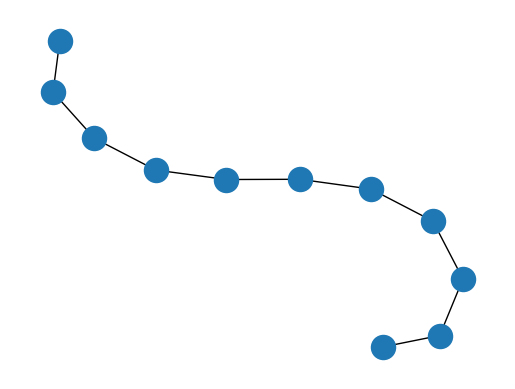

In [57]:

# Step 1
# Create a graph



G = nx.Graph()
images = []
nx.set_node_attributes(G, images, "images")

number = G.number_of_nodes()
fig, ax = plt.subplots(1,1)
nx.draw(G, ax = ax)
# Make a random plot...

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
data = cv2.resize(data, (852,480) , interpolation = cv2.INTER_AREA)
color_nodes = []

for i in tqdm(range(400)):
    # print(i)
    
    SUCCESS, frame = cam.read()
    if not SUCCESS:
        break
    data = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)
    if i == 200:
        print("restarting the video")
        cam = cv2.VideoCapture("../video/round_path.mp4")
    
    # Step 2
    # get features
    features = get_features(frame)
    if G.number_of_nodes() == 0:
        G.add_node(0, features=features)

    n = matching_features(G, features)

    if n == -1:
        print(f"Adding new node: {number + 1}, number of frames {i}")
        ax.cla()
        number = G.number_of_nodes()
        G.add_node(number + 1, features=features)
        color_nodes.append('blue')
        G.add_edge(number, number - 1)
        G.add_edge(number, number + 1)
        pos=nx.spring_layout(G,scale=100, seed = 1234)
        nx.draw(G, pos, ax = ax)
        # Make a random plot...

        # If we haven't already shown or saved the plot, then we need to
        # draw the figure first...
        fig.canvas.draw()

        # Now we can save it to a numpy array.
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # frame_1 = cv2.transpose(cv2.resizeframe)

        data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    frame = cv2.resize(frame, (480,852), interpolation = cv2.INTER_AREA)
    # print(frame.shape)
    frame_1 = np.concatenate((frame,data), axis = 1)
    # print(frame_1.shape)
    cv2.imwrite(f"tmp/{i}.png", frame_1)


    # print()

    

    # step 3
    # get similarities with the nodes

    # step 4
    # Add counter is present

    # step 5
    # Add node if not present



In [59]:
import imageio
from tqdm import tqdm
import os
fileList = []
path = 'tmp/'
for file in os.listdir('tmp/'):

    complete_path = path + file
    fileList.append(complete_path)

writer = imageio.get_writer('test_2.mp4', fps=15)

for i in tqdm(range(400)):
    im = f'tmp/{i}.png'
    writer.append_data(imageio.imread(im))
writer.close()

100%|██████████| 400/400 [00:15<00:00, 25.53it/s]


# Check what happens with random perspective

  6%|▋         | 26/400 [00:03<01:05,  5.71it/s]

Adding new node: 1, number of frames 25


 11%|█▏        | 45/400 [00:06<00:59,  5.93it/s]

Adding new node: 2, number of frames 44


 18%|█▊        | 74/400 [00:10<00:56,  5.80it/s]

Adding new node: 4, number of frames 73


 22%|██▏       | 88/400 [00:13<00:56,  5.51it/s]

Adding new node: 6, number of frames 87


 27%|██▋       | 109/400 [00:16<00:49,  5.82it/s]

Adding new node: 8, number of frames 108


 28%|██▊       | 110/400 [00:16<00:49,  5.91it/s]

FOUND THIS:10
FOUND THIS:8


 28%|██▊       | 112/400 [00:16<00:46,  6.20it/s]

FOUND THIS:8
FOUND THIS:10


 28%|██▊       | 114/400 [00:16<00:45,  6.35it/s]

FOUND THIS:8
FOUND THIS:8


 29%|██▉       | 117/400 [00:17<00:42,  6.60it/s]

FOUND THIS:8
FOUND THIS:8


 30%|██▉       | 118/400 [00:17<00:43,  6.46it/s]

FOUND THIS:8
FOUND THIS:8


 30%|███       | 121/400 [00:18<00:40,  6.87it/s]

FOUND THIS:8
FOUND THIS:8


 30%|███       | 122/400 [00:18<00:41,  6.74it/s]

FOUND THIS:8
FOUND THIS:8


 31%|███       | 124/400 [00:18<00:48,  5.64it/s]

FOUND THIS:8
FOUND THIS:8


 32%|███▏      | 126/400 [00:18<00:52,  5.26it/s]

FOUND THIS:8
FOUND THIS:8


 32%|███▏      | 128/400 [00:19<00:52,  5.15it/s]

FOUND THIS:10


 32%|███▏      | 129/400 [00:19<00:52,  5.13it/s]

FOUND THIS:10
FOUND THIS:8


 33%|███▎      | 131/400 [00:19<00:47,  5.61it/s]

FOUND THIS:8
FOUND THIS:8


 33%|███▎      | 133/400 [00:20<00:47,  5.60it/s]

FOUND THIS:10


 34%|███▎      | 134/400 [00:20<00:48,  5.46it/s]

FOUND THIS:10
FOUND THIS:10


 34%|███▍      | 137/400 [00:20<00:43,  6.11it/s]

FOUND THIS:10
FOUND THIS:10


 34%|███▍      | 138/400 [00:21<00:43,  6.09it/s]

FOUND THIS:10
FOUND THIS:10


 35%|███▌      | 140/400 [00:21<00:42,  6.06it/s]

FOUND THIS:10
FOUND THIS:10


 36%|███▌      | 142/400 [00:21<00:41,  6.27it/s]

FOUND THIS:10
FOUND THIS:10


 36%|███▌      | 144/400 [00:22<00:40,  6.37it/s]

FOUND THIS:10
FOUND THIS:10


 36%|███▋      | 146/400 [00:22<00:39,  6.36it/s]

FOUND THIS:10
FOUND THIS:10


 37%|███▋      | 148/400 [00:22<00:39,  6.31it/s]

FOUND THIS:10
FOUND THIS:10


 38%|███▊      | 150/400 [00:22<00:39,  6.32it/s]

FOUND THIS:10
FOUND THIS:10


 38%|███▊      | 152/400 [00:23<00:38,  6.49it/s]

FOUND THIS:10
FOUND THIS:10


 38%|███▊      | 154/400 [00:23<00:38,  6.33it/s]

FOUND THIS:10
FOUND THIS:10


 39%|███▉      | 156/400 [00:23<00:38,  6.41it/s]

FOUND THIS:10
Adding new node: 10, number of frames 156


 40%|███▉      | 159/400 [00:24<00:39,  6.11it/s]

FOUND THIS:10
FOUND THIS:10


 40%|████      | 160/400 [00:24<00:38,  6.29it/s]

FOUND THIS:10
FOUND THIS:12


 40%|████      | 162/400 [00:24<00:36,  6.49it/s]

FOUND THIS:12
FOUND THIS:12


 41%|████      | 164/400 [00:25<00:36,  6.41it/s]

FOUND THIS:10
FOUND THIS:10


 42%|████▏     | 166/400 [00:25<00:36,  6.40it/s]

FOUND THIS:10
FOUND THIS:10


 42%|████▏     | 168/400 [00:25<00:36,  6.41it/s]

FOUND THIS:10
FOUND THIS:10


 43%|████▎     | 171/400 [00:26<00:34,  6.62it/s]

FOUND THIS:10
FOUND THIS:10


 43%|████▎     | 172/400 [00:26<00:35,  6.49it/s]

FOUND THIS:10
FOUND THIS:10


 44%|████▎     | 174/400 [00:26<00:35,  6.28it/s]

FOUND THIS:10
FOUND THIS:12


 44%|████▍     | 176/400 [00:27<00:36,  6.22it/s]

FOUND THIS:10
FOUND THIS:10


 44%|████▍     | 178/400 [00:27<00:35,  6.29it/s]

FOUND THIS:10
FOUND THIS:10


 45%|████▌     | 180/400 [00:27<00:35,  6.26it/s]

FOUND THIS:10
FOUND THIS:10


 46%|████▌     | 182/400 [00:28<00:34,  6.30it/s]

FOUND THIS:10
FOUND THIS:10


 46%|████▌     | 184/400 [00:28<00:34,  6.34it/s]

FOUND THIS:10
FOUND THIS:10


 46%|████▋     | 186/400 [00:28<00:33,  6.45it/s]

FOUND THIS:10
FOUND THIS:10


 47%|████▋     | 188/400 [00:28<00:32,  6.51it/s]

FOUND THIS:10
FOUND THIS:10


 48%|████▊     | 190/400 [00:29<00:31,  6.58it/s]

FOUND THIS:10
FOUND THIS:10


 48%|████▊     | 192/400 [00:29<00:31,  6.64it/s]

FOUND THIS:10
FOUND THIS:10


 48%|████▊     | 194/400 [00:29<00:31,  6.55it/s]

FOUND THIS:10
FOUND THIS:10


 49%|████▉     | 196/400 [00:30<00:31,  6.54it/s]

FOUND THIS:10
FOUND THIS:10


 50%|████▉     | 198/400 [00:30<00:31,  6.44it/s]

FOUND THIS:10
FOUND THIS:10


 50%|█████     | 200/400 [00:30<00:30,  6.45it/s]

FOUND THIS:10
restarting the video


 50%|█████     | 201/400 [00:31<00:51,  3.83it/s]

FOUND THIS:8


 50%|█████     | 202/400 [00:31<00:58,  3.40it/s]

FOUND THIS:0


 51%|█████     | 203/400 [00:31<00:57,  3.43it/s]

FOUND THIS:0


 51%|█████     | 204/400 [00:32<01:01,  3.19it/s]

Adding new node: 12, number of frames 203


 51%|█████▏    | 205/400 [00:32<00:54,  3.59it/s]

FOUND THIS:0


 52%|█████▏    | 206/400 [00:32<00:53,  3.60it/s]

FOUND THIS:14


 52%|█████▏    | 207/400 [00:33<00:53,  3.63it/s]

FOUND THIS:14


 52%|█████▏    | 208/400 [00:33<00:50,  3.80it/s]

FOUND THIS:0


 52%|█████▏    | 209/400 [00:33<00:47,  4.04it/s]

FOUND THIS:0


 52%|█████▎    | 210/400 [00:33<00:45,  4.13it/s]

FOUND THIS:14


 53%|█████▎    | 211/400 [00:34<00:50,  3.76it/s]

FOUND THIS:0
FOUND THIS:0


 53%|█████▎    | 213/400 [00:34<00:46,  3.99it/s]

FOUND THIS:14
FOUND THIS:0


 54%|█████▍    | 215/400 [00:34<00:44,  4.19it/s]

FOUND THIS:0
FOUND THIS:0


 54%|█████▍    | 217/400 [00:35<00:42,  4.29it/s]

FOUND THIS:14


 55%|█████▍    | 218/400 [00:35<00:44,  4.13it/s]

FOUND THIS:14
FOUND THIS:0


 55%|█████▌    | 220/400 [00:36<00:42,  4.21it/s]

FOUND THIS:0
FOUND THIS:0


 56%|█████▌    | 222/400 [00:36<00:40,  4.36it/s]

FOUND THIS:0


 56%|█████▌    | 223/400 [00:36<00:41,  4.26it/s]

FOUND THIS:0


 56%|█████▌    | 224/400 [00:37<00:42,  4.19it/s]

FOUND THIS:0
FOUND THIS:0


 56%|█████▋    | 226/400 [00:37<00:42,  4.13it/s]

FOUND THIS:0
FOUND THIS:0


 57%|█████▋    | 228/400 [00:37<00:41,  4.16it/s]

FOUND THIS:0


 57%|█████▋    | 229/400 [00:38<00:42,  4.04it/s]

FOUND THIS:0
FOUND THIS:0


 58%|█████▊    | 231/400 [00:38<00:39,  4.26it/s]

FOUND THIS:0


 58%|█████▊    | 232/400 [00:38<00:40,  4.17it/s]

FOUND THIS:2
FOUND THIS:0


 58%|█████▊    | 234/400 [00:39<00:39,  4.17it/s]

FOUND THIS:0


 59%|█████▉    | 235/400 [00:39<00:41,  3.99it/s]

FOUND THIS:2


 59%|█████▉    | 236/400 [00:39<00:41,  3.97it/s]

FOUND THIS:14


 59%|█████▉    | 237/400 [00:40<00:42,  3.84it/s]

FOUND THIS:0
FOUND THIS:0


 60%|█████▉    | 239/400 [00:40<00:39,  4.03it/s]

FOUND THIS:14
FOUND THIS:0


 60%|██████    | 241/400 [00:41<00:34,  4.59it/s]

FOUND THIS:0
FOUND THIS:0


 61%|██████    | 243/400 [00:41<00:34,  4.53it/s]

FOUND THIS:0
FOUND THIS:0


 61%|██████▏   | 245/400 [00:41<00:35,  4.38it/s]

FOUND THIS:0


 62%|██████▏   | 246/400 [00:42<00:36,  4.25it/s]

FOUND THIS:14


 62%|██████▏   | 247/400 [00:42<00:36,  4.24it/s]

FOUND THIS:14


 62%|██████▏   | 248/400 [00:42<00:36,  4.18it/s]

FOUND THIS:14
FOUND THIS:0


 62%|██████▎   | 250/400 [00:43<00:34,  4.29it/s]

FOUND THIS:2
FOUND THIS:0


 63%|██████▎   | 252/400 [00:43<00:31,  4.67it/s]

FOUND THIS:0
FOUND THIS:0


 64%|██████▎   | 254/400 [00:43<00:31,  4.59it/s]

FOUND THIS:0


 64%|██████▍   | 255/400 [00:44<00:33,  4.34it/s]

FOUND THIS:2


 64%|██████▍   | 256/400 [00:44<00:34,  4.14it/s]

FOUND THIS:0


 64%|██████▍   | 257/400 [00:44<00:34,  4.13it/s]

FOUND THIS:14
FOUND THIS:0


 65%|██████▍   | 259/400 [00:45<00:31,  4.55it/s]

FOUND THIS:0


 65%|██████▌   | 260/400 [00:45<00:33,  4.21it/s]

FOUND THIS:0


 65%|██████▌   | 261/400 [00:45<00:33,  4.18it/s]

FOUND THIS:4
FOUND THIS:0


 66%|██████▌   | 263/400 [00:46<00:35,  3.82it/s]

FOUND THIS:2


 66%|██████▌   | 264/400 [00:46<00:34,  3.98it/s]

FOUND THIS:0
FOUND THIS:0


 66%|██████▋   | 266/400 [00:46<00:30,  4.44it/s]

FOUND THIS:0


 67%|██████▋   | 267/400 [00:47<00:33,  3.93it/s]

FOUND THIS:6


 67%|██████▋   | 268/400 [00:47<00:35,  3.73it/s]

FOUND THIS:0


 67%|██████▋   | 269/400 [00:47<00:34,  3.83it/s]

FOUND THIS:6


 68%|██████▊   | 270/400 [00:47<00:35,  3.62it/s]

FOUND THIS:6


 68%|██████▊   | 271/400 [00:48<00:35,  3.68it/s]

FOUND THIS:0
FOUND THIS:0


 68%|██████▊   | 273/400 [00:48<00:33,  3.84it/s]

FOUND THIS:14
FOUND THIS:0


 69%|██████▉   | 275/400 [00:49<00:30,  4.13it/s]

FOUND THIS:14
FOUND THIS:0


 69%|██████▉   | 277/400 [00:49<00:29,  4.18it/s]

FOUND THIS:4
FOUND THIS:0


 70%|██████▉   | 279/400 [00:50<00:27,  4.34it/s]

FOUND THIS:14
FOUND THIS:0


 70%|███████   | 281/400 [00:50<00:25,  4.68it/s]

FOUND THIS:0


 70%|███████   | 282/400 [00:50<00:26,  4.41it/s]

FOUND THIS:6
FOUND THIS:0


 71%|███████   | 284/400 [00:51<00:24,  4.71it/s]

FOUND THIS:0


 71%|███████▏  | 285/400 [00:51<00:26,  4.30it/s]

FOUND THIS:4


 72%|███████▏  | 286/400 [00:51<00:27,  4.10it/s]

FOUND THIS:14
FOUND THIS:0


 72%|███████▏  | 288/400 [00:52<00:24,  4.61it/s]

FOUND THIS:0


 72%|███████▏  | 289/400 [00:52<00:25,  4.42it/s]

FOUND THIS:14
FOUND THIS:2


 73%|███████▎  | 291/400 [00:52<00:24,  4.47it/s]

FOUND THIS:8


 73%|███████▎  | 292/400 [00:52<00:25,  4.21it/s]

FOUND THIS:8
FOUND THIS:0


 74%|███████▎  | 294/400 [00:53<00:23,  4.52it/s]

FOUND THIS:0


 74%|███████▍  | 295/400 [00:53<00:24,  4.22it/s]

FOUND THIS:4
FOUND THIS:0


 74%|███████▍  | 297/400 [00:54<00:23,  4.33it/s]

FOUND THIS:4


 74%|███████▍  | 298/400 [00:54<00:25,  4.03it/s]

FOUND THIS:4
FOUND THIS:2


 75%|███████▌  | 300/400 [00:54<00:23,  4.26it/s]

FOUND THIS:4
FOUND THIS:0


 76%|███████▌  | 302/400 [00:55<00:21,  4.63it/s]

FOUND THIS:2
FOUND THIS:2


 76%|███████▌  | 304/400 [00:55<00:19,  4.88it/s]

FOUND THIS:4


 76%|███████▋  | 305/400 [00:55<00:20,  4.60it/s]

FOUND THIS:12


 76%|███████▋  | 306/400 [00:56<00:22,  4.21it/s]

FOUND THIS:4


 77%|███████▋  | 307/400 [00:56<00:23,  4.03it/s]

FOUND THIS:4
FOUND THIS:2


 77%|███████▋  | 309/400 [00:56<00:21,  4.23it/s]

FOUND THIS:14
FOUND THIS:4


 78%|███████▊  | 311/400 [00:57<00:18,  4.73it/s]

FOUND THIS:0
FOUND THIS:0


 78%|███████▊  | 313/400 [00:57<00:19,  4.40it/s]

FOUND THIS:14
FOUND THIS:4


 79%|███████▉  | 315/400 [00:58<00:18,  4.67it/s]

FOUND THIS:4


 79%|███████▉  | 316/400 [00:58<00:18,  4.47it/s]

FOUND THIS:14


 79%|███████▉  | 317/400 [00:58<00:21,  3.95it/s]

FOUND THIS:10


 80%|███████▉  | 318/400 [00:58<00:21,  3.85it/s]

FOUND THIS:4


 80%|███████▉  | 319/400 [00:59<00:21,  3.82it/s]

FOUND THIS:10
FOUND THIS:0


 80%|████████  | 322/400 [00:59<00:17,  4.54it/s]

FOUND THIS:10
FOUND THIS:2


 81%|████████  | 323/400 [01:00<00:16,  4.74it/s]

FOUND THIS:0


 81%|████████  | 324/400 [01:00<00:17,  4.31it/s]

FOUND THIS:4


 81%|████████▏ | 325/400 [01:00<00:18,  4.11it/s]

FOUND THIS:8


 82%|████████▏ | 326/400 [01:00<00:18,  3.96it/s]

FOUND THIS:6
FOUND THIS:4


 82%|████████▏ | 328/400 [01:01<00:16,  4.38it/s]

FOUND THIS:0
FOUND THIS:0


 82%|████████▎ | 330/400 [01:01<00:16,  4.23it/s]

FOUND THIS:8
FOUND THIS:0


 83%|████████▎ | 332/400 [01:02<00:14,  4.74it/s]

FOUND THIS:4
FOUND THIS:0


 84%|████████▎ | 334/400 [01:02<00:13,  4.98it/s]

FOUND THIS:0
FOUND THIS:0


 84%|████████▍ | 336/400 [01:02<00:13,  4.57it/s]

FOUND THIS:4


 84%|████████▍ | 337/400 [01:03<00:14,  4.44it/s]

FOUND THIS:10
FOUND THIS:4


 85%|████████▍ | 339/400 [01:03<00:13,  4.49it/s]

FOUND THIS:8
FOUND THIS:4


 85%|████████▌ | 341/400 [01:03<00:11,  4.93it/s]

FOUND THIS:0
FOUND THIS:0


 86%|████████▌ | 343/400 [01:04<00:11,  4.97it/s]

FOUND THIS:4
FOUND THIS:0


 86%|████████▋ | 345/400 [01:04<00:10,  5.01it/s]

FOUND THIS:0
FOUND THIS:0


 87%|████████▋ | 347/400 [01:05<00:11,  4.54it/s]

FOUND THIS:6


 87%|████████▋ | 348/400 [01:05<00:12,  4.28it/s]

FOUND THIS:4
FOUND THIS:0


 88%|████████▊ | 350/400 [01:05<00:11,  4.26it/s]

FOUND THIS:8
FOUND THIS:0


 88%|████████▊ | 352/400 [01:06<00:10,  4.58it/s]

FOUND THIS:0
FOUND THIS:0


 88%|████████▊ | 354/400 [01:06<00:09,  4.82it/s]

FOUND THIS:0


 89%|████████▉ | 355/400 [01:06<00:09,  4.54it/s]

FOUND THIS:14


 89%|████████▉ | 356/400 [01:07<00:10,  4.29it/s]

FOUND THIS:10


 89%|████████▉ | 357/400 [01:07<00:10,  4.11it/s]

FOUND THIS:14
FOUND THIS:0


 90%|████████▉ | 359/400 [01:07<00:08,  4.56it/s]

FOUND THIS:6
FOUND THIS:0


 90%|█████████ | 361/400 [01:08<00:08,  4.55it/s]

FOUND THIS:8


 90%|█████████ | 362/400 [01:08<00:08,  4.35it/s]

FOUND THIS:14
FOUND THIS:4


 91%|█████████ | 364/400 [01:09<00:08,  4.01it/s]

FOUND THIS:14


 91%|█████████▏| 365/400 [01:09<00:08,  3.97it/s]

FOUND THIS:8
FOUND THIS:0


 92%|█████████▏| 367/400 [01:09<00:08,  4.01it/s]

FOUND THIS:14
FOUND THIS:4


 92%|█████████▏| 369/400 [01:10<00:06,  4.50it/s]

FOUND THIS:0


 92%|█████████▎| 370/400 [01:10<00:07,  4.23it/s]

FOUND THIS:4


 93%|█████████▎| 371/400 [01:10<00:07,  3.91it/s]

FOUND THIS:10
FOUND THIS:0


 93%|█████████▎| 373/400 [01:11<00:06,  4.41it/s]

FOUND THIS:4


 94%|█████████▎| 374/400 [01:11<00:06,  4.16it/s]

FOUND THIS:8


 94%|█████████▍| 375/400 [01:11<00:05,  4.23it/s]

FOUND THIS:8


 94%|█████████▍| 376/400 [01:11<00:05,  4.05it/s]

FOUND THIS:0
FOUND THIS:8


 94%|█████████▍| 378/400 [01:12<00:04,  4.62it/s]

FOUND THIS:6
FOUND THIS:6


 95%|█████████▌| 380/400 [01:12<00:04,  4.38it/s]

FOUND THIS:14
FOUND THIS:4


 96%|█████████▌| 382/400 [01:13<00:03,  4.71it/s]

FOUND THIS:0


 96%|█████████▌| 383/400 [01:13<00:03,  4.30it/s]

FOUND THIS:10
FOUND THIS:0


 96%|█████████▋| 385/400 [01:13<00:03,  4.58it/s]

FOUND THIS:0


 96%|█████████▋| 386/400 [01:14<00:03,  4.38it/s]

FOUND THIS:8
FOUND THIS:0


 97%|█████████▋| 388/400 [01:14<00:02,  4.53it/s]

FOUND THIS:0
FOUND THIS:0


 98%|█████████▊| 390/400 [01:15<00:02,  4.58it/s]

FOUND THIS:6
FOUND THIS:4


 98%|█████████▊| 392/400 [01:15<00:01,  4.43it/s]

FOUND THIS:10


 98%|█████████▊| 393/400 [01:15<00:01,  4.31it/s]

FOUND THIS:10
FOUND THIS:0


 99%|█████████▉| 395/400 [01:16<00:01,  4.30it/s]

FOUND THIS:14


 99%|█████████▉| 396/400 [01:16<00:00,  4.13it/s]

FOUND THIS:4


 99%|█████████▉| 397/400 [01:16<00:00,  3.85it/s]

FOUND THIS:4
FOUND THIS:4


100%|█████████▉| 399/400 [01:17<00:00,  4.11it/s]

FOUND THIS:8
FOUND THIS:4


100%|██████████| 400/400 [01:17<00:00,  5.17it/s]


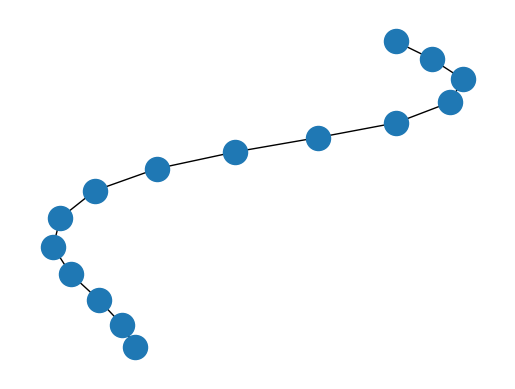

In [64]:

# Step 1
# Create a graph
cam = cv2.VideoCapture("../video/round_path.mp4")

perspective = transforms.RandomPerspective()
seed = 13648

G = nx.Graph()
images = []
nx.set_node_attributes(G, images, "images")

number = G.number_of_nodes()
fig, ax = plt.subplots(1,1)
nx.draw(G, ax = ax)
# Make a random plot...

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
data = cv2.resize(data, (852,480) , interpolation = cv2.INTER_AREA)
color_nodes = []

for i in tqdm(range(400)):
    # print(i)
    if i < 200:
        SUCCESS, frame = cam.read()
        threshold = 0.25
    else: 
        SUCCESS, frame = cam.read()
        threshold = 0.1
        frame = perspective(Image.fromarray(frame))
        frame = np.array(frame)
    
    if not SUCCESS:
        break
    data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    if i == 200:
        print("restarting the video")
        cam = cv2.VideoCapture("../video/round_path.mp4")

    
    # Step 2
    # get features
    features = get_features(frame)
    if G.number_of_nodes() == 0:
        G.add_node(0, features=features)

    n = matching_features(G, features, threshold)

    if n == -1:
        print(f"Adding new node: {number + 1}, number of frames {i}")
        ax.cla()
        number = G.number_of_nodes()
        G.add_node(number + 1, features=features)
        color_nodes.append('blue')
        G.add_edge(number, number - 1)
        G.add_edge(number, number + 1)
        pos=nx.spring_layout(G,scale=100, seed=seed)
        nx.draw_networkx(G, pos, ax = ax, color = "blue")
        # Make a random plot...

        # If we haven't already shown or saved the plot, then we need to
        # draw the figure first...
        fig.canvas.draw()

        # Now we can save it to a numpy array.
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # frame_1 = cv2.transpose(cv2.resizeframe)

        data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    else:
        print()
    data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    frame = cv2.resize(frame, (480,852), interpolation = cv2.INTER_AREA)
    # print(frame.shape)
    frame_1 = np.concatenate((frame,data), axis = 1)
    # print(frame_1.shape)
    cv2.imwrite(f"tmp/random_{i}.png", frame_1)


    # print()

    

    # step 3
    # get similarities with the nodes

    # step 4
    # Add counter is present

    # step 5
    # Add node if not present



In [65]:
import imageio
from tqdm import tqdm
import os
fileList = []
path = 'tmp/'
for file in os.listdir('tmp/'):

    complete_path = path + file
    fileList.append(complete_path)

writer = imageio.get_writer('test_4.mp4', fps=15)

for i in tqdm(range(400)):
    im = f'tmp/random_{i}.png'
    writer.append_data(imageio.imread(im))
writer.close()

100%|██████████| 400/400 [00:16<00:00, 24.17it/s]


In [14]:
# how to change the color in the network graph

  6%|▋         | 26/400 [00:04<00:50,  7.38it/s]

Adding new node: 1, number of frames 25


 14%|█▍        | 55/400 [00:10<00:51,  6.64it/s]

Adding new node: 2, number of frames 54


 20%|██        | 80/400 [00:15<00:42,  7.57it/s]

Adding new node: 4, number of frames 79


 25%|██▌       | 101/400 [00:17<00:34,  8.61it/s]

Adding new node: 6, number of frames 99


 39%|███▉      | 157/400 [00:24<00:29,  8.14it/s]

Adding new node: 8, number of frames 156


 50%|█████     | 200/400 [00:29<00:24,  8.01it/s]

restarting the video


 51%|█████     | 204/400 [00:30<00:32,  5.98it/s]

Adding new node: 10, number of frames 202


 54%|█████▍    | 217/400 [00:32<00:26,  6.84it/s]

Adding new node: 12, number of frames 216


 56%|█████▌    | 224/400 [00:33<00:27,  6.33it/s]

Adding new node: 14, number of frames 223


 73%|███████▎  | 293/400 [00:46<00:20,  5.23it/s]

Adding new node: 16, number of frames 292


 76%|███████▋  | 305/400 [00:48<00:18,  5.19it/s]

Adding new node: 18, number of frames 304
Adding new node: 20, number of frames 305


 95%|█████████▌| 380/400 [01:03<00:04,  4.70it/s]

Adding new node: 22, number of frames 379


100%|██████████| 400/400 [01:07<00:00,  5.92it/s]


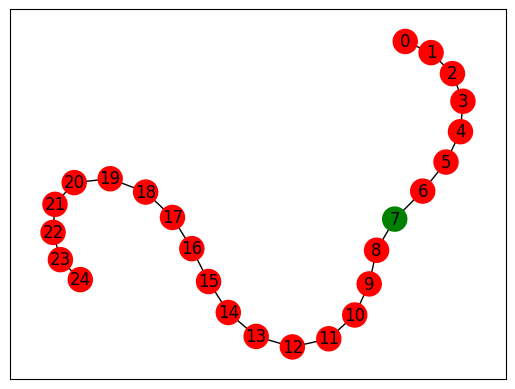

In [25]:

# Step 1
# Create a graph
cam = cv2.VideoCapture("../video/round_path.mp4")

perspective = transforms.RandomPerspective()
seed = 13648

G = nx.Graph()
images = []
nx.set_node_attributes(G, images, "images")

number = G.number_of_nodes()
fig, ax = plt.subplots(1,1)
nx.draw(G, ax = ax)
# Make a random plot...

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
data = cv2.resize(data, (852,480) , interpolation = cv2.INTER_AREA)
color_nodes = []

for i in tqdm(range(400)):
    # print(i)
    if i < 200:
        SUCCESS, frame = cam.read()
        threshold = 0.25
    else: 
        SUCCESS, frame = cam.read()
        threshold = 0.18
        frame = perspective(Image.fromarray(frame))
        frame = np.array(frame)
    
    if not SUCCESS:
        break
    data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    if i == 200:
        print("restarting the video")
        cam = cv2.VideoCapture("../video/round_path.mp4")

    
    # Step 2
    # get features
    features = get_features(frame)
    if G.number_of_nodes() == 0:
        G.add_node(0, features=features)

    n = matching_features(G, features, threshold)

    if n == -1:
        print(f"Adding new node: {number + 1}, number of frames {i}")
        ax.cla()
        number = G.number_of_nodes()
        G.add_node(number + 1, features=features)
        color_nodes.append('blue')
        G.add_edge(number, number - 1)
        G.add_edge(number, number + 1)
        pos=nx.spring_layout(G,scale=100, seed=seed)
        nx.draw_networkx(G, pos, ax = ax, node_color = "blue")
        # Make a random plot...

        # If we haven't already shown or saved the plot, then we need to
        # draw the figure first...
        fig.canvas.draw()

        # Now we can save it to a numpy array.
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # frame_1 = cv2.transpose(cv2.resizeframe)

        data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    else:
        ax.cla()

        color_list = ['red'] * G.number_of_nodes()
        color_list[n] = "green"
        pos = nx.spring_layout(G, scale=100, seed = seed)
        nx.draw_networkx(G, pos, node_color = color_list, ax = ax)

        fig.canvas.draw()
        data = np.frombuffer( fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    frame = cv2.resize(frame, (480,852), interpolation = cv2.INTER_AREA)
    # print(frame.shape)
    frame_1 = np.concatenate((frame,data), axis = 1)
    # print(frame_1.shape)
    cv2.imwrite(f"tmp/random_{i}.png", frame_1)


    # print()

    

    # step 3
    # get similarities with the nodes

    # step 4
    # Add counter is present

    # step 5
    # Add node if not present



In [26]:
import imageio
from tqdm import tqdm
import os
fileList = []
path = 'tmp/'
for file in os.listdir('tmp/'):

    complete_path = path + file
    fileList.append(complete_path)

writer = imageio.get_writer('test_7.mp4', fps=15)

for i in tqdm(range(400)):
    im = f'tmp/random_{i}.png'
    writer.append_data(imageio.imread(im))
writer.close()

100%|██████████| 400/400 [00:16<00:00, 24.58it/s]


# split window into three parts.


In [ ]:

# Step 1
# Create a graph
cam = cv2.VideoCapture("../video/round_path.mp4")

perspective = transforms.RandomPerspective()
seed = 13648

G = nx.Graph()
images = []
nx.set_node_attributes(G, images, "images")

number = G.number_of_nodes()
fig, ax = plt.subplots(1,1)
nx.draw(G, ax = ax)
# Make a random plot...

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
data = cv2.resize(data, (852,480) , interpolation = cv2.INTER_AREA)
color_nodes = []

for i in tqdm(range(400)):
    # print(i)
    if i < 200:
        SUCCESS, frame = cam.read()
        threshold = 0.25
    else: 
        SUCCESS, frame = cam.read()
        threshold = 0.18
        frame = perspective(Image.fromarray(frame))
        frame = np.array(frame)
    
    if not SUCCESS:
        break
    data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    if i == 200:
        print("restarting the video")
        cam = cv2.VideoCapture("../video/round_path.mp4")

    
    # Step 2
    # get features
    features = get_features(frame)
    if G.number_of_nodes() == 0:
        G.add_node(0, features=features)

    n = matching_features(G, features, threshold)

    if n == -1:
        print(f"Adding new node: {number + 1}, number of frames {i}")
        ax.cla()
        number = G.number_of_nodes()
        G.add_node(number + 1, features=features)
        color_nodes.append('blue')
        G.add_edge(number, number - 1)
        G.add_edge(number, number + 1)
        pos=nx.spring_layout(G,scale=100, seed=seed)
        nx.draw_networkx(G, pos, ax = ax, node_color = "blue")
        # Make a random plot...

        # If we haven't already shown or saved the plot, then we need to
        # draw the figure first...
        fig.canvas.draw()

        # Now we can save it to a numpy array.
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # frame_1 = cv2.transpose(cv2.resizeframe)

        data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    else:
        ax.cla()

        color_list = ['red'] * G.number_of_nodes()
        color_list[n] = "green"
        pos = nx.spring_layout(G, scale=100, seed = seed)
        nx.draw_networkx(G, pos, node_color = color_list, ax = ax)

        fig.canvas.draw()
        data = np.frombuffer( fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        data = cv2.resize(data, (480,852) , interpolation = cv2.INTER_AREA)
    frame = cv2.resize(frame, (480,852), interpolation = cv2.INTER_AREA)
    # print(frame.shape)
    frame_1 = np.concatenate((frame,data), axis = 1)
    # print(frame_1.shape)
    cv2.imwrite(f"tmp/random_{i}.png", frame_1)


    # print()

    

    # step 3
    # get similarities with the nodes

    # step 4
    # Add counter is present

    # step 5
    # Add node if not present

